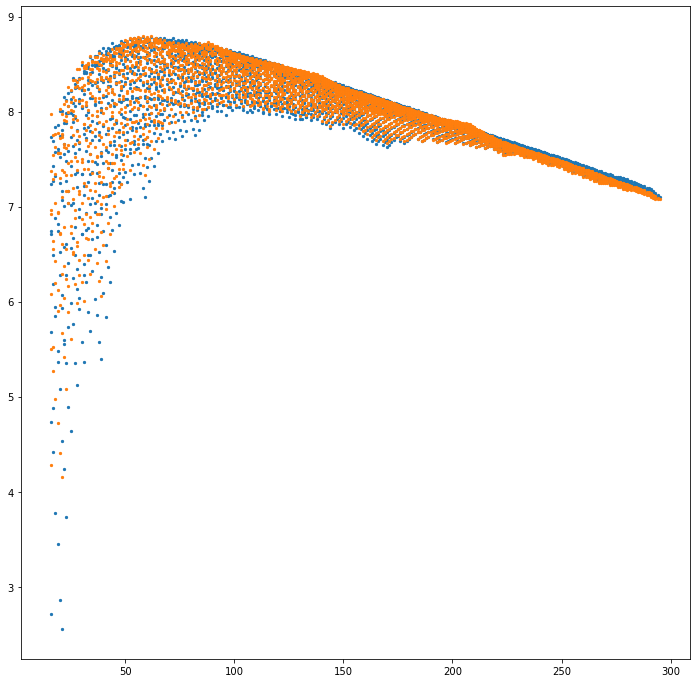

11.445


In [7]:
#SEMF

import numpy as np
import matplotlib.pyplot as plt
import math

measuredNuclearData = np.loadtxt("ZNBE.dat")

for i in measuredNuclearData:
    
    i[2] = i[2] * (i[0] + i[1]) 

#Index 0 is a set of coefficients found on wikipedia that gives a very good chi square score
#Any additional indices are those found by my other programs to test that those programs work
Av = [15.8, 8.333, 27.6]
As = [-18.3, 0, -23.3]
Ac = [-0.714, 0, -2.7]
Aa = [-23.2, -25, -25.7]
Ap = [12, 25, -24.5]
Kp = [-0.5, -1.0, -0.5] 

j = 0

chiSq = 0
SEMFData = []
realData = []

for i in measuredNuclearData:
    
    if i[0] +i[1] < 16:
        continue
    
    Z = i[0]
    N = i[1]
    A = N + Z
    
    vol = Av[j] * A
    sur = As[j] * A**(2/3)
    cou = Ac[j] * (Z * (Z - 1)) * A**(-1/3)
    asy = Aa[j] * (N - Z)**2 * A**(-1)
    
    if Z%2==0 and N%2==0:
        pai = Ap[j] * A**Kp[j]
    elif Z%2!=0 and N%2!=0:
        pai = -Ap[j] * A**Kp[j]
    else:
        pai = 0
    
    BE = vol + sur + cou + asy + pai
    
    SEMFData.append([A, BE])
    realData.append([A, i[2]])
    chiSq += (BE - i[2])**2
    
plt.figure(figsize=(12,12))

A = [i[0] for i in SEMFData]
BE = [i[1]/i[0] for i in SEMFData]

plt.scatter(A, BE, s=5)

A = [i[0] for i in realData]
BE = [i[1]/i[0] for i in realData]

plt.scatter(A, BE, s = 5)
plt.show()

print(round(math.log(chiSq), 3))

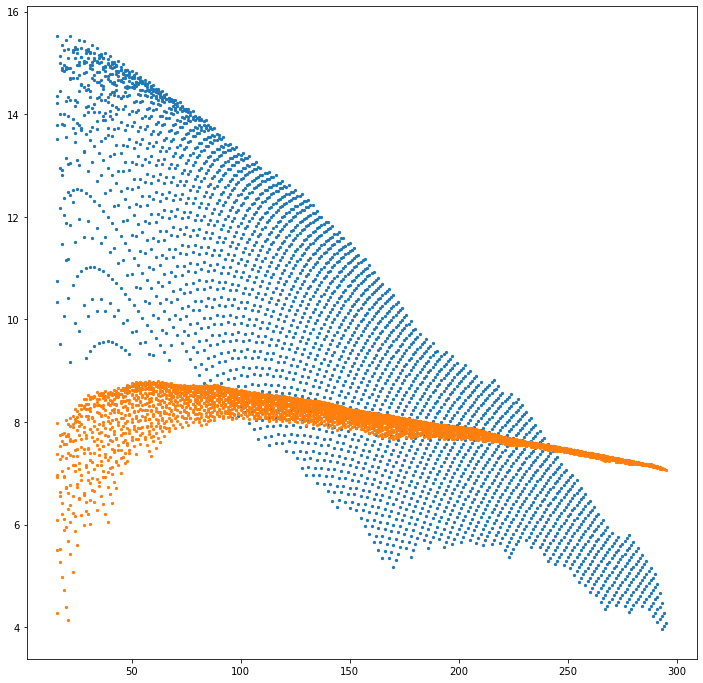

324421439.01650065


In [5]:
j = 2

chiSq = 0
SEMFData = []
realData = []

for i in measuredNuclearData:
     
    if i[0] +i[1] < 16:
        continue
    
    Z = i[0]
    N = i[1]
    A = N + Z
    
 
    vol = Av[j] * A
    sur = As[j] * A**(2/3)
    cou = Ac[j] * (Z * (Z - 1)) * A**(-1/3)
    asy = Aa[j] * (N - Z)**2 * A**(-1)
    
    if Z%2==0 and N%2==0:
        pai = Ap[j] * A**Kp[j]
    elif Z%2!=0 and N%2!=0:
        pai = -Ap[j] * A**Kp[j]
    else:
        pai = 0
    
    BE = vol + sur + cou + asy + pai
    
    SEMFData.append([A, BE])
    realData.append([A, i[2]])
    chiSq += (BE - i[2])**2
    
plt.figure(figsize=(12,12))

A = [i[0] for i in SEMFData]
BE = [i[1]/i[0] for i in SEMFData]

plt.scatter(A, BE, s=5)

A = [i[0] for i in realData]
BE = [i[1]/i[0] for i in realData]

plt.scatter(A, BE, s = 5)
plt.show()

print(chiSq)